In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''1. Read the file and display columns.'''

df_cruise_ship=pd.read_csv('/home/samia/Downloads/cruise_ship_info.csv')

'''displaying cols'''
cols=list(df_cruise_ship.columns)
print(cols)

#df_cruise_ship.head() # getting cols with top 5 data rows

#pd.set_option('display.max_columns', None) #ensuring no column is missed
#print(df_cruise_ship)

['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']


'Observations:\nThe variables are on different scales (eg Age ranges from 10 to 50, while the Tonnage variable ranges from 2 to 220).\nThis can be verifies by looking at the standard deviations and mean values from describe().\nHence, we need to ensure that all variables are brought to the same scale either by standardizing or normalizing the data.\nThis will allow all the variables to contribute equally to the analysis, without creating a bias.\nEach of the variables also seems to take the form of a underlying gaussian distribution when we look at the pairplot.\nSo a standardisation of data suits better in this context.\n'

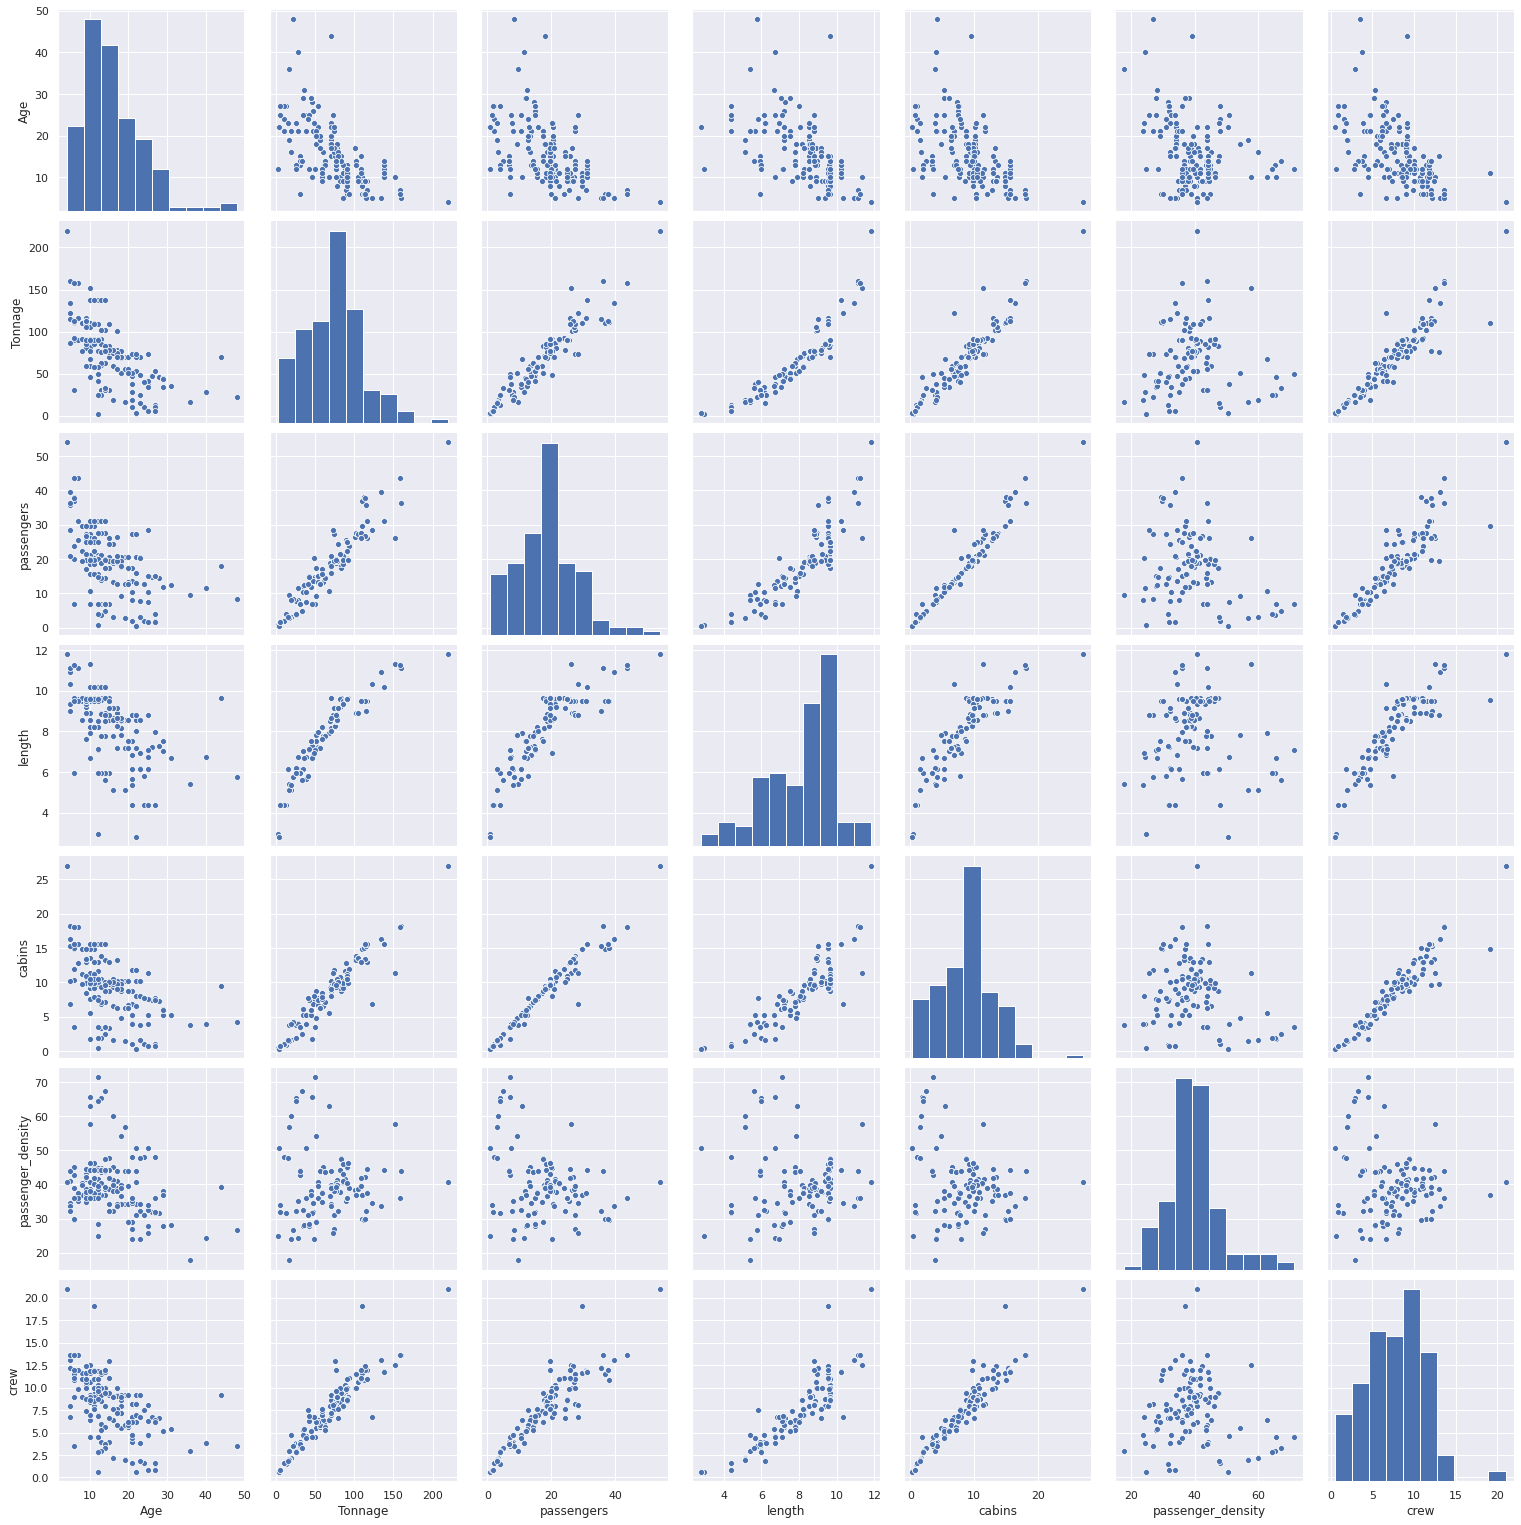

In [157]:
'''2. summary statistics and examination'''
df_cruise_ship.describe()

import seaborn as sns
cols_evaluate = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
sns.pairplot(df_cruise_ship[cols_evaluate], height=3.0)

'''Observations:
The variables are on different scales (e.g. Age ranges from 10 to 50, while the Tonnage variable ranges from 2 to 220).
This can be verifies by looking at the standard deviations and mean values from describe().
Hence, we need to ensure that all variables are brought to the same scale either by standardizing or normalizing the data.
This will allow all the variables to contribute equally to the analysis, without creating a bias.
Each of the variables also seems to take the form of a underlying gaussian distribution when we look at the pairplot.
So a standardisation of data suits better in this context.
'''


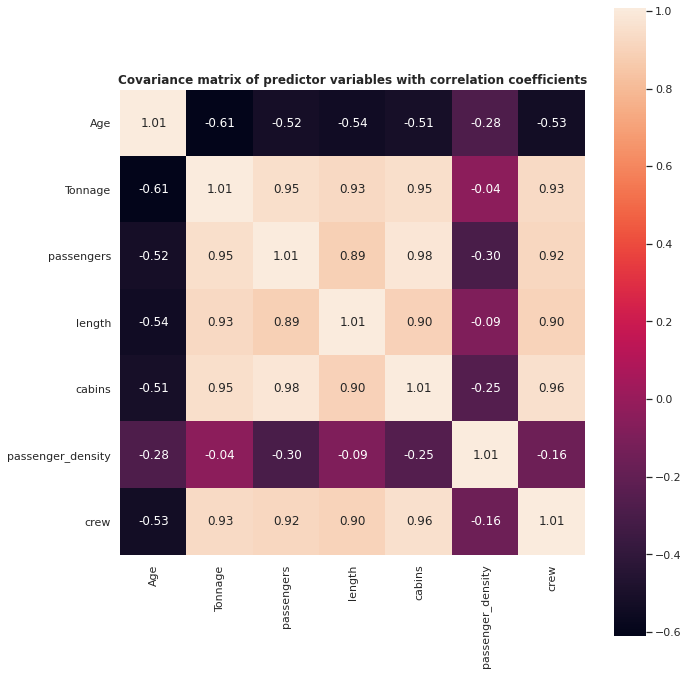

'4. If you removed columns explain why you removed those.\nThe first two columns are categorical with high cardinality. Seems like having them as features would \nnot suit our model. From the covariance matrix, we can take Tonnage, passsengers, length and cabin are the primary\npredictor variables to predict the crew size.\nAge and passenger_density are dropped since they show negative correlation values.\n'

In [163]:
'''3. Select columns that will be probably important to predict “crew” size.

From the pairplot it seems that the target variable 'crew' correlates with predictor variables :‘Tonnage’, ‘passengers’, ‘length’, and ‘cabins’.
Verified using a covariance matrix'''

from sklearn.preprocessing import StandardScaler


cols_evaluate = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew'] 
std_scaler= StandardScaler()
x_std = std_scaler.fit_transform(df_cruise_ship[cols_evaluate].iloc[:,range(0,7)].values)
cov_matrix =np.cov(x_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
hm = sns.heatmap(cov_matrix,
                 cbar=True,
                 square=True,
                 annot=True,                 
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols_evaluate,
                 xticklabels=cols_evaluate)
plt.title('Covariance matrix of predictor variables with correlation coefficients', fontweight='bold')
plt.tight_layout()
plt.show()


'''4. If you removed columns explain why you removed those.
The first two columns are categorical with high cardinality. Seems like having them as features would 
not suit our model. From the covariance matrix, we can take Tonnage, passsengers, length and cabin are the primary
predictor variables to predict the crew size.
Age and passenger_density are dropped since they show negative correlation values.
'''




In [164]:
'''One hot encoding of categorical variables Ship_name and Cruise_line :
We do not use these for the regressor due to the high cardinality observed in these as stated earlier.'''

df_cruise_ship_new = pd.concat([df_cruise_ship,pd.get_dummies(df_cruise_ship['Ship_name'], prefix='Ship_name')],axis=1)
df_cruise_ship_new.drop(['Ship_name'],axis=1, inplace=True)

df_cruise_ship_new = pd.concat([df_cruise_ship_new,pd.get_dummies(df_cruise_ship_new['Cruise_line'], prefix='Cruise_line')],axis=1)
df_cruise_ship_new.drop(['Cruise_line'],axis=1, inplace=True)

print(df_cruise_ship_new)


     Age  Tonnage  passengers  length  cabins  passenger_density   crew  \
0      6   30.277        6.94    5.94    3.55              42.64   3.55   
1      6   30.277        6.94    5.94    3.55              42.64   3.55   
2     26   47.262       14.86    7.22    7.43              31.80   6.70   
3     11  110.000       29.74    9.53   14.88              36.99  19.10   
4     17  101.353       26.42    8.92   13.21              38.36  10.00   
..   ...      ...         ...     ...     ...                ...    ...   
153   22    3.341        0.66    2.79    0.33              50.62   0.59   
154   14   76.800       19.60    8.79    9.67              39.18  12.00   
155   25    5.350        1.58    4.40    0.74              33.86   0.88   
156   27    5.350        1.67    4.40    0.74              32.04   0.88   
157   23   14.745        3.08    6.17    1.56              47.87   1.80   

     Ship_name_Adventure  Ship_name_Allegra  Ship_name_Amsterdam  ...  \
0                      0  

In [165]:
'''6. Create training and testing sets (use 60% of the data for the training and reminder for testing).'''
from sklearn.model_selection import train_test_split


cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']

X = df_cruise_ship[cols_selected].iloc[:,0:4].values    #features/predictors 
y = df_cruise_ship[cols_selected]['crew'].values        # target: crew

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0) #60% training and 40% test

print(len(X_train)) # 94/158

94


In [166]:
'''7. Build a machine learning model to predict the ‘crew’ size.
starting with a linear regressor without feature standardization.
'''
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

'''Evaluation'''

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))



MSE train: 0.95, test: 0.89
R^2 train: 0.92, test: 0.93


In [167]:
'''8. Calculate the Pearson correlation coefficient for the training set and testing data sets.'''
from scipy.stats.stats import pearsonr
print(X_train.shape, X_test.shape)
X_train_flat=X_train.flatten().tolist()
X_test_flat=X_test.flatten().tolist()

#print(len(X_train_flat), len(X_test_flat))
print(type(X_train_flat))

#need to sample top 50 values to since x_train and x_test are unequal in length
x_train_sample= X_train_flat[:50]  #getting 50%
x_test_sample = X_test_flat[:50]  #getting 50%

pearson_coef, p_value = pearsonr(x_train_sample, x_test_sample) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) #shows a positive correlation 


'''splitting the data 50-50'''
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=0)
pearson_coef, p_value = pearsonr(X_train.flatten().tolist(), X_test.flatten().tolist()) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) #strong correlation




(94, 4) (64, 4)
<class 'list'>
Pearson Correlation Coefficient:  0.821606222307704 and a P-value of: 2.656595757622446e-13
Pearson Correlation Coefficient:  0.663599690423189 and a P-value of: 1.7807910768799621e-41


In [168]:
'''9. Describe hyper-parameters in your model and how you would change them to improve 
the performance of the model.'''
'''Feature standardization (scaling), cross validation and tuning of hyper-parameters which is the random state
of the linear regressor - Further explanation later'''

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df_cruise_ship[cols_selected].iloc[:,0:4].values     
y = df_cruise_ship[cols_selected]['crew']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    
print('R2 scores on training data', train_score)
print('R2 scores on test data', test_score)
print('Mean R2 scores on train data with std deviation', np.mean(train_score),np.std(train_score))
print('Mean R2 scores on test data with std deviation', np.mean(test_score),np.std(test_score))



R2 scores on training data [0.92028261 0.91733937 0.94839385 0.93899476 0.90621451 0.91156903
 0.92726066 0.94000795 0.93922948 0.93629554]
R2 scores on test data [0.92827978 0.93807946 0.8741834  0.89901199 0.94781315 0.91880183
 0.91437408 0.89660876 0.90427477 0.90139208]
Mean R2 scores on train data with std deviation 0.9285587755355218 0.013383264611434477
Mean R2 scores on test data with std deviation 0.912281929059594 0.02070444044776785


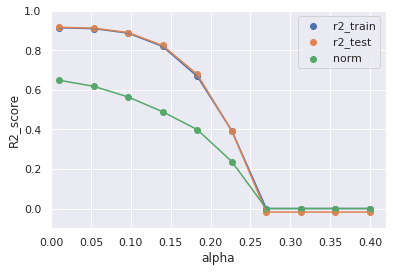

In [169]:
'''Regularized regression model - A different approach with standardized features'''
from sklearn.model_selection import train_test_split
sc_y = StandardScaler()
sc_x = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)

alpha = np.linspace(0.01,0.4,10) # regularization parameter

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7)

'''11. Plotting the R2 score which is the square of the pearson correlation coefficient with the changing values 
of the hyper-parameter alpha for lasso regression for train and test data sets.'''
r2_train=[]
r2_test=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std=lasso.predict(X_train_std)
    y_test_std=lasso.predict(X_test_std)
    r2_train=np.append(r2_train,r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test=np.append(r2_test,r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm= np.append(norm,np.linalg.norm(lasso.coef_))
    
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.42)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()


In [170]:
'''9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
From the standard linear regressor, the hyper-parameters from the model are test_size, random_state.
We could do a hyper-parameter search to figure out which values for these hyperparameters work best.

In the Lasso regression, we have alpha along with the test size and random state as hyperparameters.
A plot showing the R2 score and the value of alpha is already displayed to figure out the best possible 
value for this hyper-paarameter.

A cross validation alongside hyperparameter search is a recommended process that finds the best hyper-parameters
and thus improves the model performance.

Even the number of features may be treated as a hyper-parameter. The maximum number of features that works best for 
model can be ascertained by Principal component analysis technique. The accuracy measures can be plotted from the test
and train sets alongside the number of principal components used.

10.What is regularization? What is the regularization parameter in your model?
Regularization is method which enables reduction of error by fitting a function appropriately to a training
data set, while avoiding overfitting.

From Lasso regression, as the regularization parameter alpha increases, the norm of the regression coefficients become smaller and smaller. 
This means more regression coefficients are forced to zero, which intend increases bias error (over simplification of the model). 
Thus alpha needs to be 0.1 or below to get the best bias-variance trade-off.
'''

'9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.\nFrom the standard linear regressor, the hyper-parameters from the model are test_size, random_state.\nWe could do a hyper-parameter search to figure out which values for these hyperparameters work best.\n\nIn the Lasso regression, we have alpha along with the test size and random state as hyperparameters.\nA plot showing the R2 score and the value of alpha is already displayed to figure out the best possible \nvalue for this hyper-paarameter.\n\nA cross validation alongside hyperparameter search is a recommended process that finds the best hyper-parameters\nand thus improves the model performance.\n\nEven the number of features may be treated as a hyper-parameter. The maximum number of features that works best for \nmodel can be ascertained by Principal component analysis technique. The accuracy measures can be plotted from the test\nand train sets alongside the number of

R2 score on train data set [0.90411898 0.9041488  0.90416405 0.92028261]
R2 score on test data set [0.89217843 0.89174896 0.89159266 0.92827978]
Cumulative variance explained by the principal components [0.949817   0.98322819 0.99587366 1.        ]


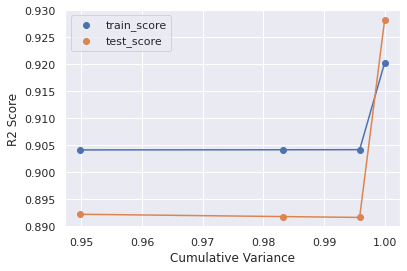

'Observations from PCA:\nThere is a bias problem in the model. This is highlighted from the improving scores on train and test datasets as\nthe number of principal components are increased from 1 to 4. There is a high bias error when the number of principal\ncomponents is low, since the model is oversimplified. As we increase the number of principal components, the bias error reduces but the model becomes gradually complex.\n'

In [172]:
'''11. Even Principal component analysis can be used to verify the effect of principal components as hyper-parameters.'''
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
    
train_score = []
test_score = []
cumulative_variance = []

for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cumulative_variance = np.append(cumulative_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

print('R2 score on train data set', train_score)
print('R2 score on test data set',test_score)
print('Cumulative variance explained by the principal components', cumulative_variance)


'''Plotting the R2 scores (Squared Pearson correlation coeff) for train and test data sets alongside the cumulative variance explained'''

plt.scatter(cumulative_variance,train_score, label = 'train_score')
plt.plot(cumulative_variance, train_score)
plt.scatter(cumulative_variance,test_score, label = 'test_score')
plt.plot(cumulative_variance, test_score)
plt.xlabel('Cumulative Variance')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

'''Observations from PCA:
There is a bias problem in the model. This is highlighted from the improving scores on train and test datasets as
the number of principal components are increased from 1 to 4. There is a high bias error when the number of principal
components is low, since the model is oversimplified. As we increase the number of principal components, the bias error reduces but the model becomes gradually complex.
'''